# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 32: Relaxed Risk Parity Portfolio Optimization

## 1. Downloading the data:

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2020-01-01'
end = '2023-01-01'

# # Tickers of assets
# assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
#           'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
#           'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets = ['AAPL','PEP','JNJ','TSLA','BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  5 of 5 completed


In [3]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,AAPL,BA,JNJ,PEP,TSLA
Date,,,,,
2020-01-03,-0.9722%,-0.1680%,-1.1578%,-0.1399%,2.9633%
2020-01-06,0.7968%,0.2945%,-0.1248%,0.3834%,1.9255%
2020-01-07,-0.4703%,1.0607%,0.6107%,-1.5718%,3.8801%
2020-01-08,1.6086%,-1.7523%,-0.0138%,0.5149%,4.9205%
2020-01-09,2.1241%,1.4998%,0.2966%,0.0668%,-2.1945%


## 2. Estimating Vanilla Risk Parity Portfolio

### 2.1 Calculating the vanilla risk parity portfolio.

In [4]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model = 'Classic' # Could be Classic (historical) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w_rp.T)

,AAPL,BA,JNJ,PEP,TSLA
weights,17.0393%,12.2775%,33.4818%,26.0470%,11.1543%


### 2.2 Plotting portfolio composition

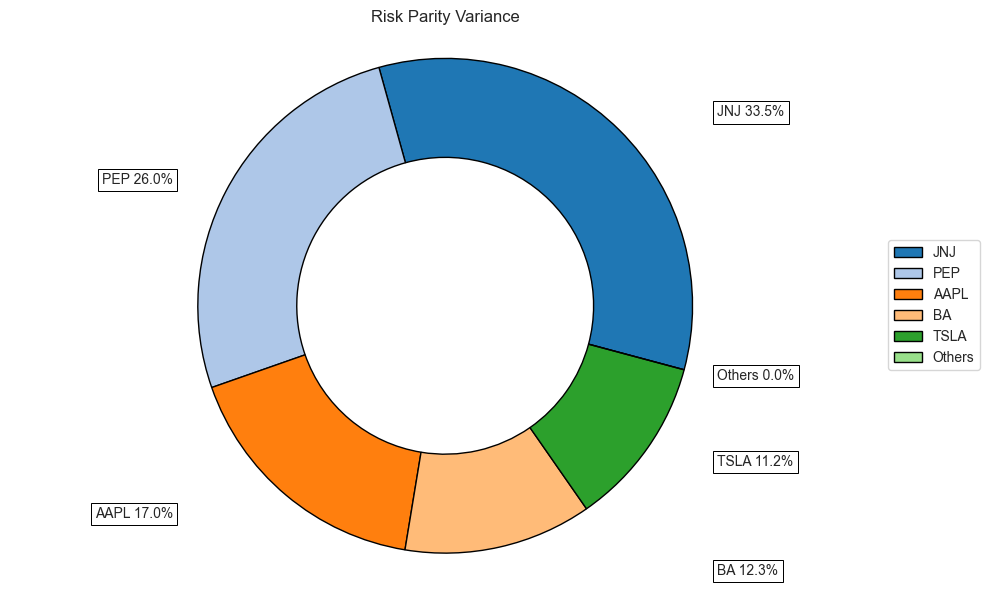

In [5]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_rp, title='Risk Parity Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Plotting Risk Composition

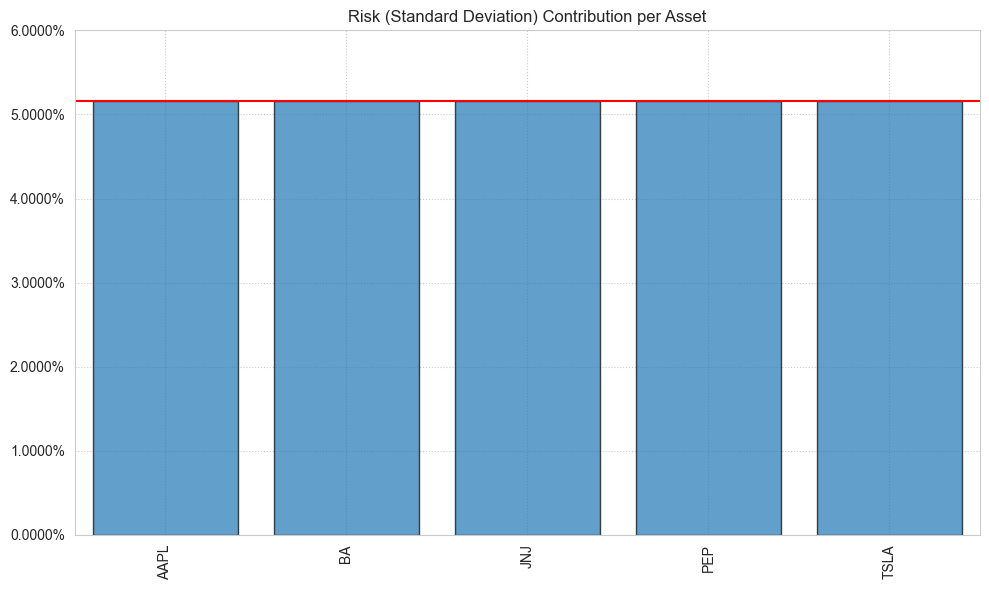

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=ax)

# Plotting equal risk contribution line
a1 = rp.Sharpe_Risk(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01)
ax.axhline(y=a1/len(assets) * 252**0.5, color='r', linestyle='-')

plt.show()

## 3. Estimating Relaxed Risk Parity Portfolios

In this part I will calculate relaxed risk parity portfolios (Gambeta and Kwon 2020) using the versions A, B and C of the model. The relaxed risk parity is a model that allows to incorporate contraints on returns in the vanilla risk parity model.

### 3.1 Calculating the relaxed risk parity portfolio version A.

In [7]:
b = None # Risk contribution constraints vector
version = 'A' # Could be A, B or C
l = 1 # Penalty term, only valid for C version

# Setting the return constraint
port.lowerret = 0.00056488 * 1.5

w_rrp_a = port.rrp_optimization(model=model, version=version, l=l, b=b, hist=hist)

display(w_rrp_a.T)

,AAPL,BA,JNJ,PEP,TSLA
weights,16.6319%,12.0453%,33.1505%,25.7339%,12.4384%


### 3.2 Plotting portfolio composition

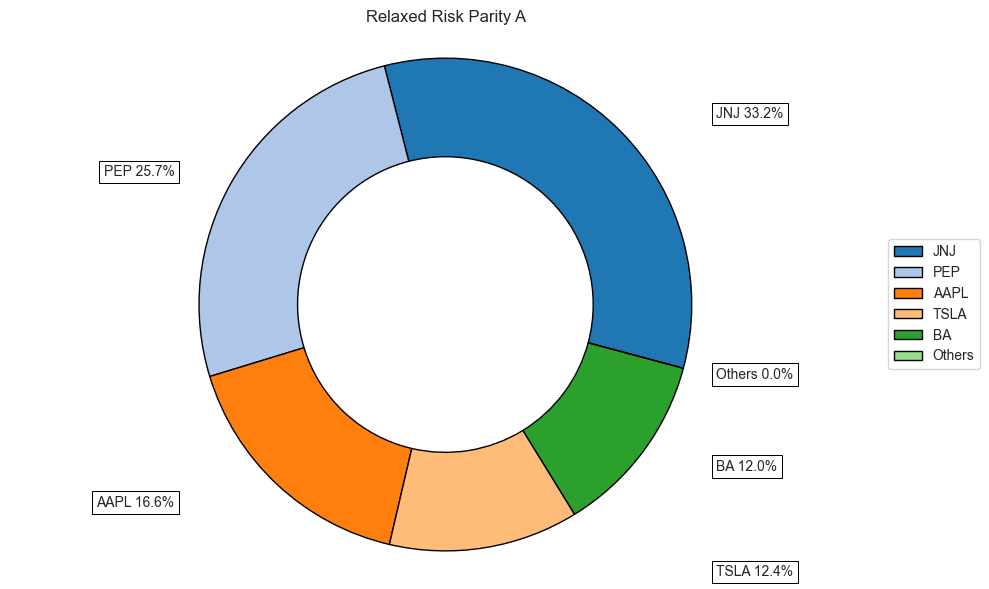

In [8]:
ax = rp.plot_pie(w=w_rrp_a, title='Relaxed Risk Parity A', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3  Plotting Risk Composition

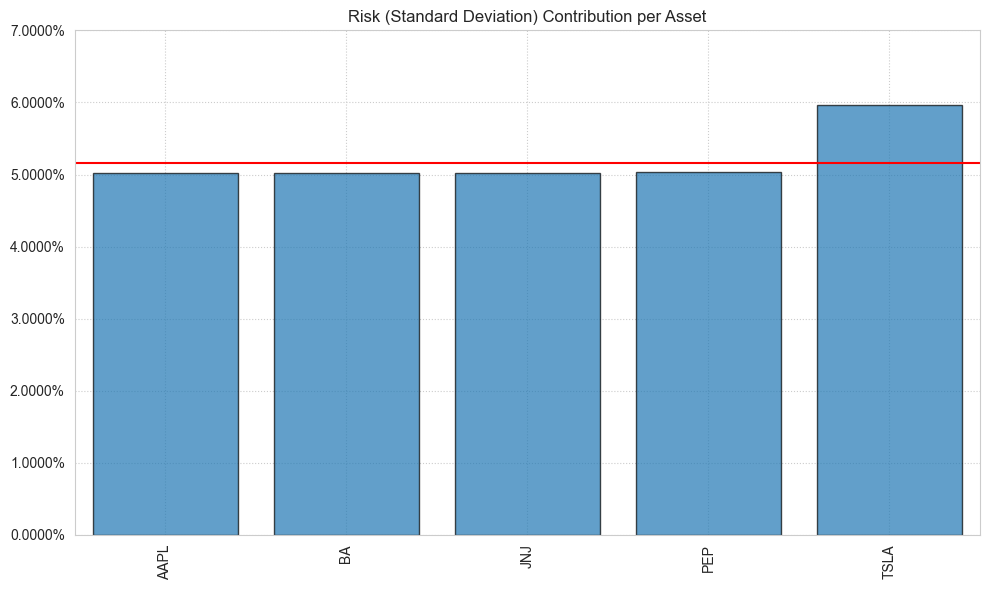

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rrp_a, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=ax)

# Plotting equal risk contribution line
ax.axhline(y=a1/len(assets) * 252**0.5, color='r', linestyle='-')

plt.show()

### 3.4 Calculating the relaxed risk parity portfolio version B.

In [10]:
version = 'B' # Could be A, B or C

w_rrp_b = port.rrp_optimization(model=model, version=version, l=l, b=b, hist=hist)

display(w_rrp_b.T)

,AAPL,BA,JNJ,PEP,TSLA
weights,16.6327%,12.0458%,33.1652%,25.7168%,12.4394%


### 3.5 Plotting portfolio composition

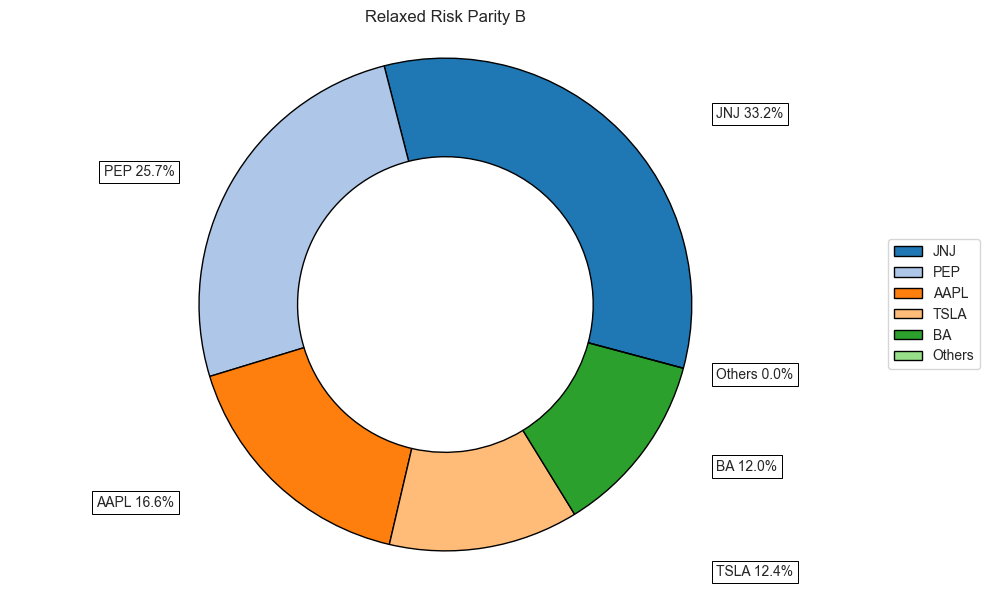

In [11]:
ax = rp.plot_pie(w=w_rrp_b, title='Relaxed Risk Parity B', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.6  Plotting Risk Composition

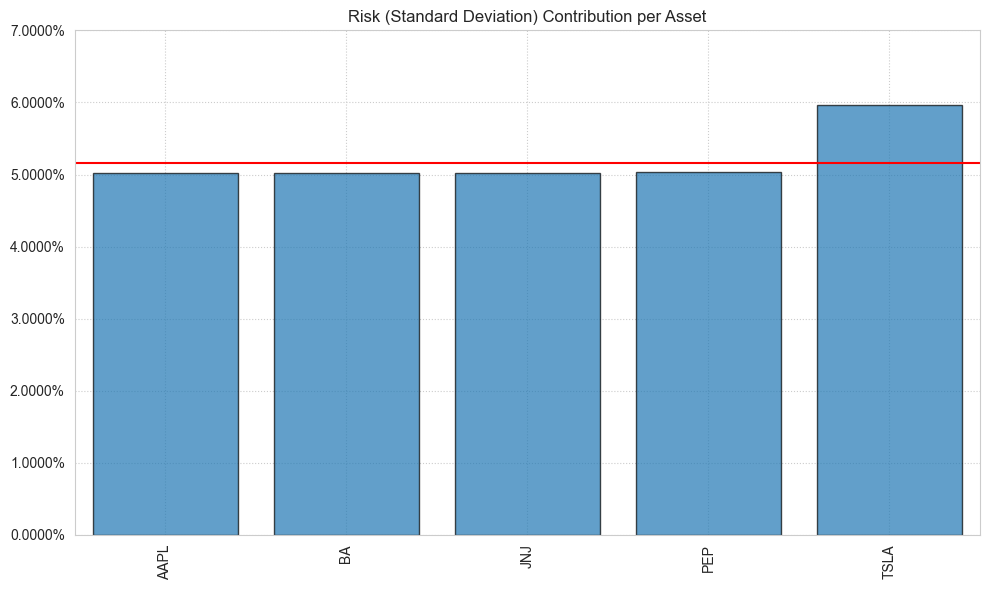

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rrp_b, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=ax)

# Plotting equal risk contribution line
ax.axhline(y=a1/len(assets) * 252**0.5, color='r', linestyle='-')

plt.show()

### 3.7 Calculating the relaxed risk parity portfolio version C.

In [13]:
version = 'C' # Could be A, B or C

w_rrp_c = port.rrp_optimization(model=model, version=version, l=l, b=b, hist=hist)

display(w_rrp_c.T)

,AAPL,BA,JNJ,PEP,TSLA
weights,16.6355%,12.0562%,33.0424%,25.8330%,12.4329%


### 3.8 Plotting portfolio composition

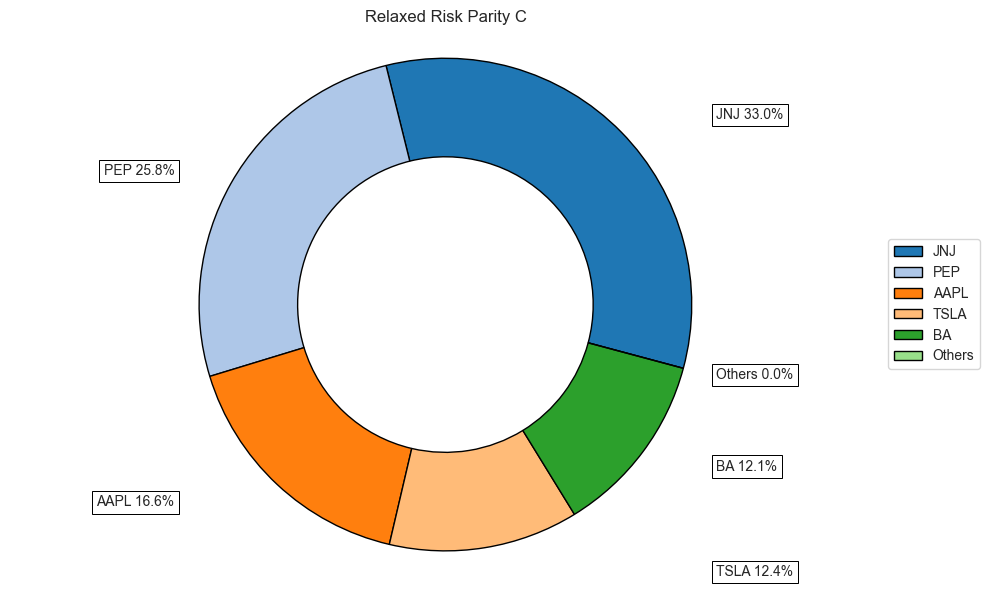

In [14]:
ax = rp.plot_pie(w=w_rrp_c, title='Relaxed Risk Parity C', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.9  Plotting Risk Composition

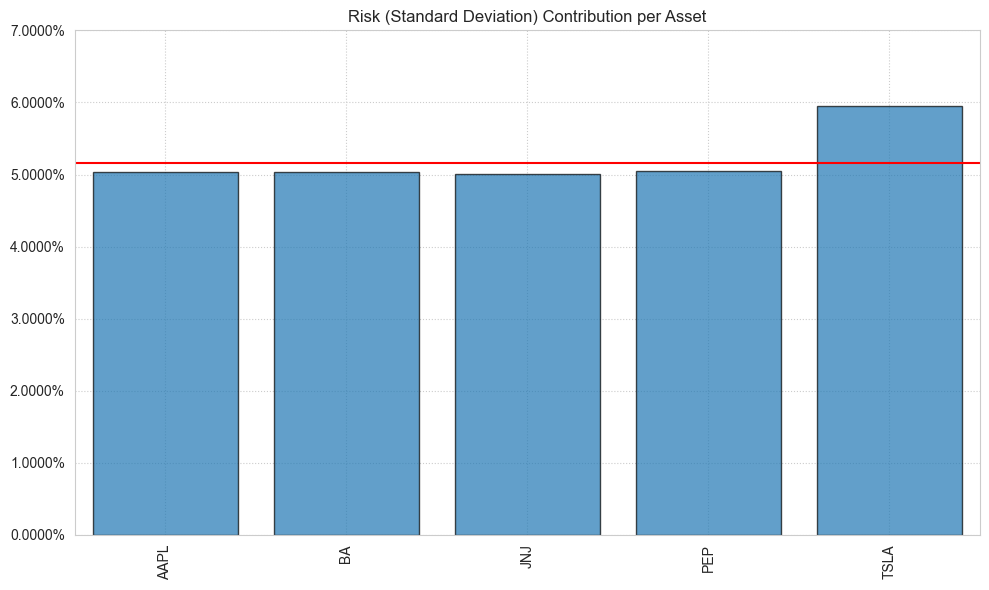

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rrp_c, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=ax)

# Plotting equal risk contribution line
ax.axhline(y=a1/len(assets) * 252**0.5, color='r', linestyle='-')

plt.show()

## 4. Estimating Relaxed Risk Parity Portfolios with Linear Constraints

In this part I will calculate relaxed risk parity portfolios with additional linear constraints.

### 4.1 Building the Linear Constraints

In [15]:
asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health Care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False, False, False],
               'Type': ['All Assets', 'Classes', 'Classes', 'Classes',
                        'Classes'],
               'Set': ['', 'Industry', 'Industry', 'Industry', 'Industry'],
               'Position': ['', 'Financials', 'Utilities', 'Industrials',
                            'Consumer Discretionary'],
               'Sign': ['<=', '<=', '<=', '<=', '<='],
               'Weight': [0.10, 0.2, 0.2, 0.2, 0.2],
               'Type Relative': ['', '', '', '', ''],
               'Relative Set': ['', '', '', '', ''],
               'Relative': ['', '', '', '', ''],
               'Factor': ['', '', '', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,10.0000%,,,,
1,False,Classes,Industry,Financials,<=,20.0000%,,,,
2,False,Classes,Industry,Utilities,<=,20.0000%,,,,
3,False,Classes,Industry,Industrials,<=,20.0000%,,,,
4,False,Classes,Industry,Consumer Discretionary,<=,20.0000%,,,,


### 4.2 Calculating the relaxed risk parity portfolio version C

In [16]:
A, B = rp.assets_constraints(constraints, asset_classes)

port.ainequality = A
port.binequality = B

w_rrp_c = port.rrp_optimization(model=model, version=version, l=l, b=b, hist=hist)

display(w_rrp_c.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.3552%,5.7580%,10.0000%,0.6452%,4.3342%,6.3038%,1.3608%,9.4151%,5.1918%,1.3364%,...,3.0089%,6.1434%,1.4713%,0.5614%,0.8001%,5.4389%,10.0000%,0.4099%,3.1493%,1.6065%


### 4.3 Plotting portfolio composition

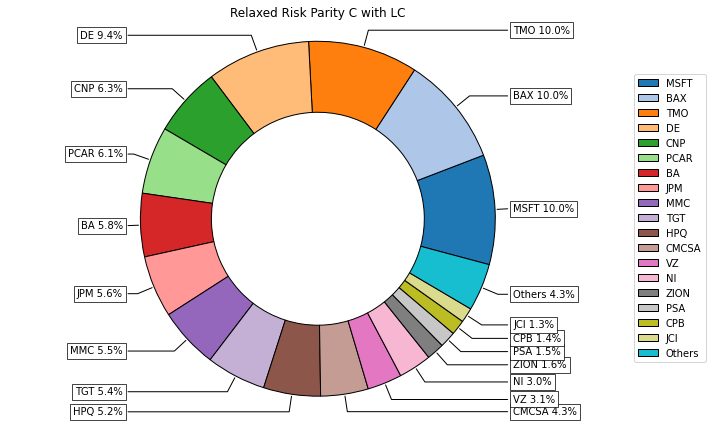

In [17]:
ax = rp.plot_pie(w=w_rrp_c, title='Relaxed Risk Parity C with LC', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [18]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w_rrp_c], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()

display(w_classes)

,weights
Industry,
Consumer Discretionary,11.1095%
Consumer Staples,2.3934%
Energy,0.3552%
Financials,20.0000%
Health Care,20.6452%
Industrials,16.4814%
Information Technology,15.1918%
Materials,0.5614%
Telecommunications Services,3.9493%


### 4.4  Plotting Risk Composition

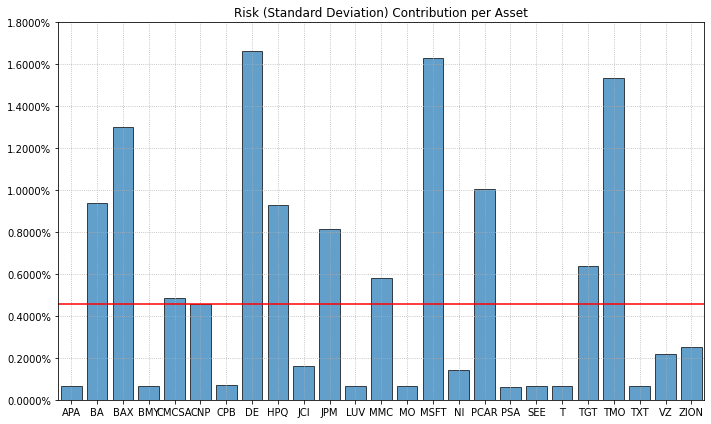

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rrp_c, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=ax)

# Plotting equal risk contribution line
ax.axhline(y=a1/len(assets) * 252**0.5, color='r', linestyle='-')

plt.show()